In [16]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import json

# Tokenizer save point
tk_save='/content/drive/MyDrive/Final Project 4375/tokenizer_config.json'
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Final Project 4375/ExtractedTweets.csv")

PREPROCESSING AND SETTING UP THE DATA

In [17]:
def preprocess_tweet(tweet):
    tweet = re.sub(r'\bRT\b', '', tweet)  # Remove 'RT' (retweet symbol)
    tweet = re.sub(r'@\w+', '', tweet)    # Remove '@' mentions
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  # Remove URLs
    return tweet.strip()

# Apply preprocessing to the 'Tweet' column of dataset
df['Tweet'] = df['Tweet'].apply(preprocess_tweet)

# Tokenize the text
tokenizer = Tokenizer(num_words=20000) # Num of individual words the model is taking into account
tokenizer.fit_on_texts(df['Tweet'])
X = tokenizer.texts_to_sequences(df['Tweet'])
X = pad_sequences(X, maxlen=100)

# Save the tokenizer configuration
tokenizer_config = tokenizer.to_json()
with open(tk_save, 'w', encoding='utf-8') as f:
    f.write(tokenizer_config)
y = pd.get_dummies(df['Party'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NEURAL NETWORK AND TRAINING

In [14]:
# Build the neural network model
model = Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_length=100),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
1730/1730 [==============================] - 93s 54ms/step - loss: 0.5920 - accuracy: 0.6614 - val_loss: 0.5083 - val_accuracy: 0.7376
Epoch 2/10
1730/1730 [==============================] - 87s 50ms/step - loss: 0.3921 - accuracy: 0.8182 - val_loss: 0.5156 - val_accuracy: 0.7381
Epoch 3/10
1730/1730 [==============================] - 92s 53ms/step - loss: 0.2011 - accuracy: 0.9148 - val_loss: 0.7753 - val_accuracy: 0.7284
Epoch 4/10
1730/1730 [==============================] - 91s 53ms/step - loss: 0.1035 - accuracy: 0.9575 - val_loss: 1.0065 - val_accuracy: 0.7168
Epoch 5/10
1730/1730 [==============================] - 97s 56ms/step - loss: 0.0688 - accuracy: 0.9727 - val_loss: 1.4564 - val_accuracy: 0.7156
Epoch 6/10
1730/1730 [==============================] - 106s 61ms/step - loss: 0.0488 - accuracy: 0.9799 - val_loss: 1.4151 - val_accuracy: 0.7138
Epoch 7/10
1730/1730 [==============================] - 100s 58ms/step - loss: 0.0410 - accuracy: 0.9835 - val_loss: 2.0350

GRAPHING

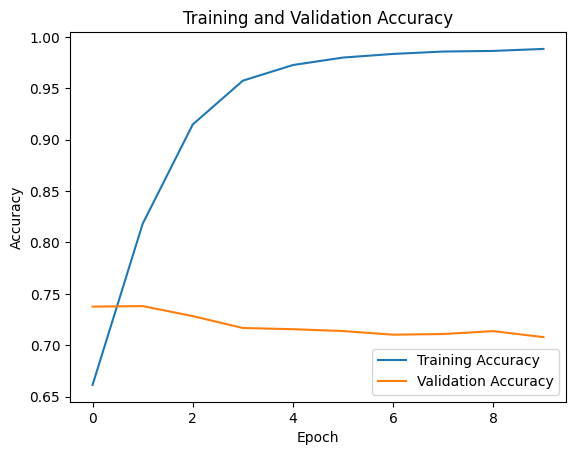

In [15]:
# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


TESTING

In [ ]:

# Function to preprocess the input text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    return text

# Load the tokenizer used for training
tokenizer = Tokenizer(num_words=20000)

# Load tokenizer word index
with open(tk_save, 'r') as f:
    word_index = json.load(f)
    tokenizer.word_index = word_index

def predict_party(text):
    # Preprocess the input text
    processed_text = preprocess_text(text)

    # Tokenize and pad the processed text
    sequences = tokenizer.texts_to_sequences([processed_text])
    padded_sequences = pad_sequences(sequences, maxlen=100)

    # Predict the party lean
    party_prediction = model.predict(padded_sequences)[0]

    # Get the predicted class index
    predicted_class_index = np.argmax(party_prediction)

    # Get the probability of the predicted class
    predicted_probability = party_prediction[predicted_class_index]

    # Calculate the confidence percentage
    confidence_percentage = predicted_probability * 100


    # Map the predicted class index to party lean
    if predicted_class_index == 0:
        return "Democrat", confidence_percentage
    else:
        return "Republican", confidence_percentage


# User input
user_text = input("Enter the text to predict party lean: ")

# Predict party lean
predicted_party, party_percent = predict_party(user_text)
print("Predicted Party Lean:", predicted_party)
if party_percent is not None:
    print("Confidence Percentage:", "{:.2f}%".format(party_percent))
